Exploratory Data Analysis

In [80]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\alina\Downloads\archive\fueltype.csv"
)

print(df.head())
print("\nInformation about the dataset:")
df.info()



   Unnamed: 0   brand                name           bodyType    year  \
0           0  Toyota  Land Cruiser Prado       jeep 5 doors  1995.0   
1           1  Toyota        Land Cruiser       jeep 5 doors     NaN   
2           2  Toyota                Vitz  hatchback 5 doors  2019.0   
3           3  Toyota             Mark II              sedan  2002.0   
4           4  Toyota                RAV4       jeep 5 doors  2010.0   

  transmission  power  fuelType  
0           AT  130.0    Diesel  
1    Automatic  286.0    Diesel  
2          CVT   95.0  Gasoline  
3           AT  160.0  Gasoline  
4           AT  170.0  Gasoline  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498740 entries, 0 to 1498739
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1498740 non-null  int64  
 1   brand         1498740 non-null  object 
 2   name          1498740 non-null  ob

The dataset contains a single table; therefore, no relationship keys between tables are required.

In [81]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.head())
print(f"Number of records: {df.shape[0]}")
print(f"Number of attributes: {df.shape[1]}")





    brand                name           bodyType    year transmission  power  \
0  Toyota  Land Cruiser Prado       jeep 5 doors  1995.0           AT  130.0   
1  Toyota        Land Cruiser       jeep 5 doors     NaN    Automatic  286.0   
2  Toyota                Vitz  hatchback 5 doors  2019.0          CVT   95.0   
3  Toyota             Mark II              sedan  2002.0           AT  160.0   
4  Toyota                RAV4       jeep 5 doors  2010.0           AT  170.0   

   fuelType  
0    Diesel  
1    Diesel  
2  Gasoline  
3  Gasoline  
4  Gasoline  
Number of records: 1498740
Number of attributes: 7


In [82]:
n = len(df)
print("Column           | Missing (count) | Missing (%)")
print("------------------------------------------")
for col in df.columns:
    miss = df[col].isna().sum()
    print(f"{col:15} | {miss:14} | {miss/n:10.2%}")


Column           | Missing (count) | Missing (%)
------------------------------------------
brand           |              0 |      0.00%
name            |              0 |      0.00%
bodyType        |              0 |      0.00%
year            |         583041 |     38.90%
transmission    |           7401 |      0.49%
power           |          14240 |      0.95%
fuelType        |           6595 |      0.44%


In [83]:
rows_with_na = df.isna().any(axis=1).sum()
print("Rows with at least one missing value:", rows_with_na)
print("Proportion of incomplete rows:", rows_with_na / len(df))


Rows with at least one missing value: 583681
Proportion of incomplete rows: 0.38944780282103636


I chose to remove the rows that had no value for fuelType, since this represents the target variable of the problem, and also the rows with missing values in the year column because it had a very high percentage of missing values (>20%).

In [84]:
df = df.dropna(subset=["fuelType"])
df = df.dropna(subset=["year"])

print("\nMissing values after removing rows without fuelType:\n")
print("Column           | Missing values")
print("---------------------------------")
for col in df.columns:
    print(f"{col:15} | {df[col].isna().sum()}")


Missing values after removing rows without fuelType:

Column           | Missing values
---------------------------------
brand           | 0
name            | 0
bodyType        | 0
year            | 0
transmission    | 0
power           | 640
fuelType        | 0


For the rows with missing values in the power column, I chose not to remove them, but to replace those values with the median, since it is not affected by extreme values.

In [85]:
df["power"] = df["power"].fillna(df["power"].median())

print("\nMissing values after filling the power column:\n")
print("Column           | Missing values")
print("---------------------------------")
for col in df.columns:
    print(f"{col:15} | {df[col].isna().sum()}")




Missing values after filling the power column:

Column           | Missing values
---------------------------------
brand           | 0
name            | 0
bodyType        | 0
year            | 0
transmission    | 0
power           | 0
fuelType        | 0


In [86]:

print("Remaining rows:", df.shape[0])
print("Remaining attributes:", df.shape[1])


Remaining rows: 915699
Remaining attributes: 7


In [87]:
counts = df["fuelType"].value_counts()
percents = df["fuelType"].value_counts(normalize=True) * 100

pd.DataFrame({
    "Count": counts,
    "Percent (%)": percents.round(2)
})

,Count,Percent (%)
fuelType,,
Gasoline,815208,89.03
Diesel,99851,10.90
Electro,640,0.07


In [88]:
cols_check = ["brand", "name", "year", "power", "bodyType", "transmission", "fuelType"]

df.duplicated(subset=cols_check).sum()

913972

In [89]:
df[df.duplicated(subset=cols_check, keep=False)].sort_values(cols_check)

,brand,name,bodyType,year,transmission,power,fuelType
332838,Acura,MDX,jeep 5 doors,2003.0,AT,265.0,Gasoline
334847,Acura,MDX,jeep 5 doors,2003.0,AT,265.0,Gasoline
336854,Acura,MDX,jeep 5 doors,2003.0,AT,265.0,Gasoline
338863,Acura,MDX,jeep 5 doors,2003.0,AT,265.0,Gasoline
340870,Acura,MDX,jeep 5 doors,2003.0,AT,265.0,Gasoline
...,...,...,...,...,...,...,...
1491356,Volvo,XC90,jeep 5 doors,2006.0,AT,311.0,Gasoline
1492965,Volvo,XC90,jeep 5 doors,2006.0,AT,311.0,Gasoline
1494571,Volvo,XC90,jeep 5 doors,2006.0,AT,311.0,Gasoline
1496174,Volvo,XC90,jeep 5 doors,2006.0,AT,311.0,Gasoline


In [90]:
n_initial = df.shape[0]

df_unique = df.drop_duplicates(subset=cols_check)

n_unique = df_unique.shape[0]

print("Initial number of rows:", n_initial)
print("Number of rows after removing duplicates:", n_unique)
print("Percentage retained:", round(n_unique / n_initial * 100, 2), "%")

Initial number of rows: 915699
Number of rows after removing duplicates: 1727
Percentage retained: 0.19 %


In [92]:
counts = df_unique["fuelType"].value_counts()
percents = df_unique["fuelType"].value_counts(normalize=True) * 100

df_classes = pd.DataFrame({
    "Number of observations": counts,
    "Percent (%)": percents.round(2)
})

df_classes

,Number of observations,Percent (%)
fuelType,,
Gasoline,1503,87.03
Diesel,221,12.80
Electro,3,0.17


A significant number of duplicate observations were identified in the dataset. After removing duplicates based on the selected feature set, the dataset size decreased substantially, indicating that many records represented identical vehicles. Eliminating these duplicates ensures that the analysis and subsequent modeling are performed on unique observations, preventing bias, data leakage, and artificially inflated model performance.

brand, name, bodyType, transmission, and fuelType are categorical attributes.
year and power are numerical attributes.

In [93]:
df.dtypes


brand            object
name             object
bodyType         object
year            float64
transmission     object
power           float64
fuelType         object
dtype: object

Global distribution (numerical attributes)

In [96]:
df = df_unique

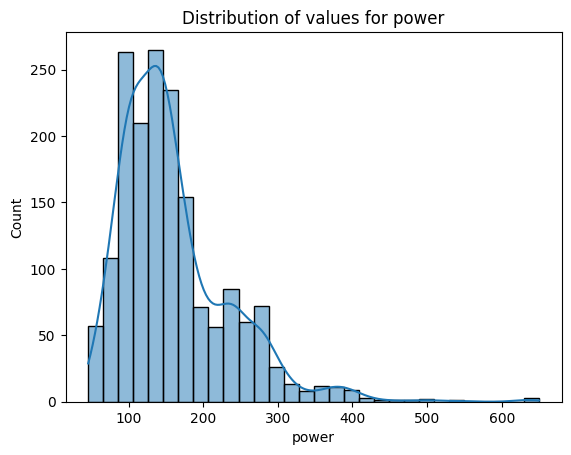

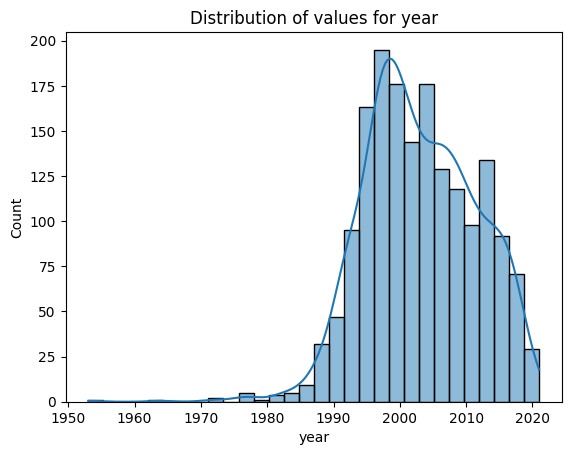

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["power"], bins=30, kde=True)
plt.title("Distribution of values for power")
plt.show()

sns.histplot(df["year"], bins=30, kde=True)
plt.title("Distribution of values for year")
plt.show()

Distribution of categorical attributes

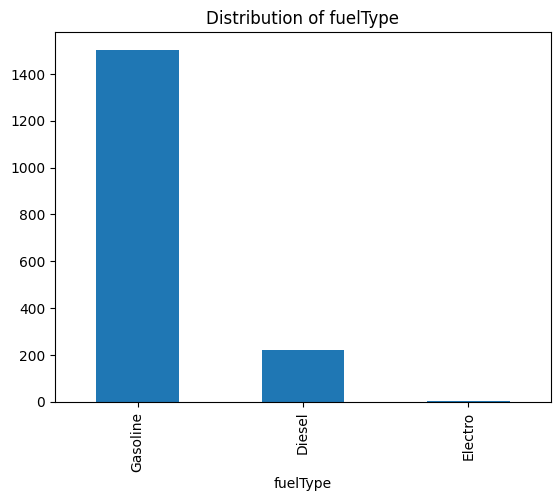

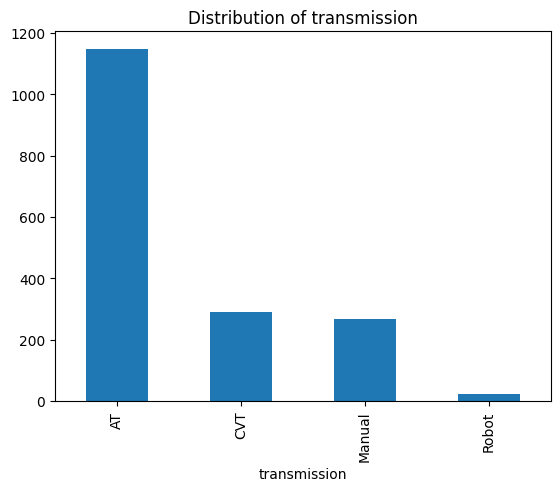

In [98]:
df["fuelType"].value_counts().plot(kind="bar", title="Distribution of fuelType")
plt.show()

df["transmission"].value_counts().plot(kind="bar", title="Distribution of transmission")
plt.show()

Types of Transmission

AT → Automatic Transmission – traditional automatic gearbox

CVT → Continuously Variable Transmission – automatic gearbox with continuous variation (no fixed gears)

Manual → Manual Transmission – manual gearbox

Robot → Robotized / Automated Manual Transmission – automated manual gearbox


The year variable is concentrated in relatively recent intervals, with a median around 2006.
The power variable shows high dispersion, with significant differences between the minimum and maximum values, indicating the presence of extreme values.

In [99]:
df[["year", "power"]].describe()


,year,power
count,1727.000000,1727.000000
mean,2003.056167,159.961783
std,8.382842,73.746110
min,1953.000000,46.000000
25%,1997.000000,107.000000
50%,2002.000000,144.000000
75%,2009.000000,190.000000
max,2021.000000,650.000000


The presence of extreme values can be observed for the power variable, especially at higher values and for certain fuel types.
The year variable shows fewer extreme values, being more concentrated in recent intervals.

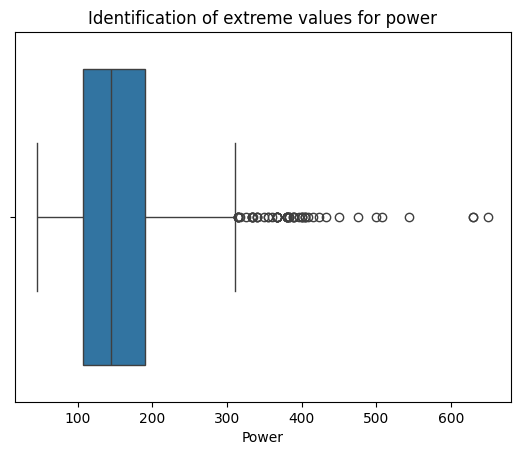

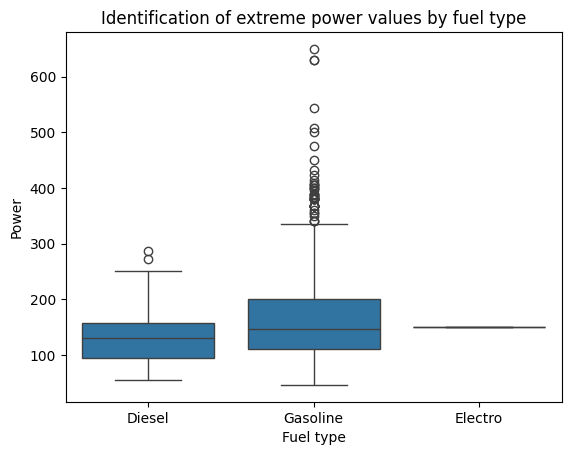

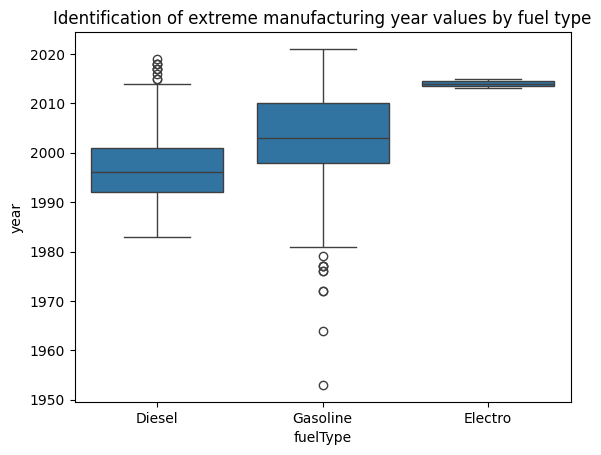

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["power"])
plt.title("Identification of extreme values for power")
plt.xlabel("Power")
plt.show()

sns.boxplot(data=df, x="fuelType", y="power")
plt.title("Identification of extreme power values by fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Power")
plt.show()

sns.boxplot(data=df, x="fuelType", y="year")
plt.title("Identification of extreme manufacturing year values by fuel type")
plt.show()

No obvious outliers or human errors were identified, such as negative power values or impossible manufacturing years.

In [101]:
print("Minimum year:", df["year"].min())
print("Maximum year:", df["year"].max())

Minimum year: 1953.0
Maximum year: 2021.0


In [102]:
print("Negative power values:", (df["power"] < 0).sum())
print("Negative year values:", (df["year"] < 0).sum())

Negative power values: 0
Negative year values: 0


The Pearson correlation between year and power is weak, indicating a low linear relationship between the manufacturing year and engine power.

           year     power
year   1.000000  0.219641
power  0.219641  1.000000


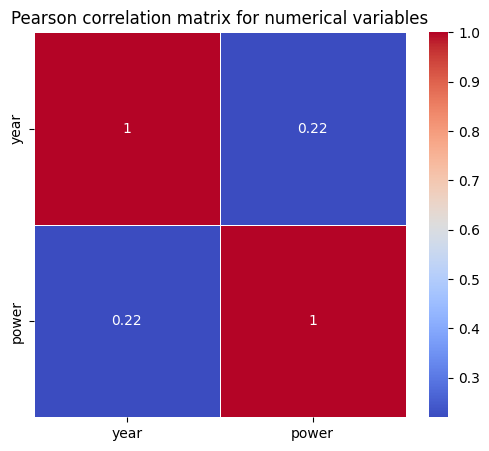

In [103]:
num_cols = df[["year", "power"]]

corr_pearson = num_cols.corr(method="pearson")
print(corr_pearson)

plt.figure(figsize=(6,5))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson correlation matrix for numerical variables")
plt.show()

                 brand      name  bodyType  transmission  fuelType
brand         1.000000 -0.045550  0.181704     -0.022445 -0.077999
name         -0.045550  1.000000 -0.209490     -0.046822  0.001995
bodyType      0.181704 -0.209490  1.000000     -0.020629  0.054612
transmission -0.022445 -0.046822 -0.020629      1.000000 -0.029634
fuelType     -0.077999  0.001995  0.054612     -0.029634  1.000000


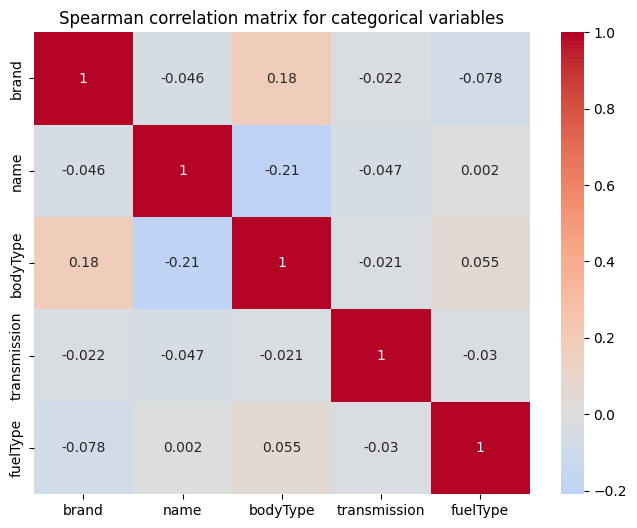

In [105]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = df.select_dtypes(include=["object"]).columns

# Encode them numerically (Label Encoding)
df_cat = df[cat_cols].copy()
le = LabelEncoder()

for col in cat_cols:
    df_cat[col] = le.fit_transform(df_cat[col])

# Spearman correlation matrix
corr_spearman = df_cat.corr(method="spearman")
print(corr_spearman)

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", center=0)
plt.title("Spearman correlation matrix for categorical variables")
plt.show()


In [106]:

y = df["fuelType"]
X = df.drop(columns=["fuelType"])

# One-Hot
X_encoded = pd.get_dummies(X)

X_encoded = X_encoded.astype(int)

print(X_encoded.head())



   year  power  brand_Acura  brand_Audi  brand_BMW  brand_Cadillac  \
0  1995    130            0           0          0               0   
2  2019     95            0           0          0               0   
3  2002    160            0           0          0               0   
4  2010    170            0           0          0               0   
8  2002    315            0           0          0               0   

   brand_Chevrolet  brand_Chrysler  brand_Daewoo  brand_Daihatsu  ...  \
0                0               0             0               0  ...   
2                0               0             0               0  ...   
3                0               0             0               0  ...   
4                0               0             0               0  ...   
8                0               0             0               0  ...   

   bodyType_liftback  bodyType_minivan  bodyType_open  bodyType_pickup  \
0                  0                 0              0             

In [108]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_final = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print(X_final.head())


       year     power  brand_Acura  brand_Audi  brand_BMW  brand_Cadillac  \
0 -0.961309 -0.406401    -0.048182   -0.048182  -0.090404        -0.02407   
1  1.902511 -0.881139    -0.048182   -0.048182  -0.090404        -0.02407   
2 -0.126028  0.000518    -0.048182   -0.048182  -0.090404        -0.02407   
3  0.828579  0.136158    -0.048182   -0.048182  -0.090404        -0.02407   
4 -0.126028  2.102933    -0.048182   -0.048182  -0.090404        -0.02407   

   brand_Chevrolet  brand_Chrysler  brand_Daewoo  brand_Daihatsu  ...  \
0        -0.053885        -0.02407      -0.03405       -0.121197  ...   
1        -0.053885        -0.02407      -0.03405       -0.121197  ...   
2        -0.053885        -0.02407      -0.03405       -0.121197  ...   
3        -0.053885        -0.02407      -0.03405       -0.121197  ...   
4        -0.053885        -0.02407      -0.03405       -0.121197  ...   

   bodyType_liftback  bodyType_minivan  bodyType_open  bodyType_pickup  \
0          -0.072379    

In [115]:
X_final.shape


(1727, 472)

In [116]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X_final)

# Explained variance of each component
explained_variance = pca.explained_variance_ratio_

explained_variance

array([7.29771227e-03, 6.63640975e-03, 5.68894089e-03, 5.45471025e-03,
       4.97301191e-03, 4.94192077e-03, 4.84628366e-03, 4.81672592e-03,
       4.67659720e-03, 4.63928372e-03, 4.59012392e-03, 4.53417616e-03,
       4.48111333e-03, 4.40859000e-03, 4.34616624e-03, 4.33142079e-03,
       4.31891891e-03, 4.30044731e-03, 4.28148719e-03, 4.27241843e-03,
       4.26353413e-03, 4.25908826e-03, 4.25300340e-03, 4.25160616e-03,
       4.24966962e-03, 4.24662609e-03, 4.24555190e-03, 4.24425660e-03,
       4.24354070e-03, 4.24261509e-03, 4.24175221e-03, 4.24151964e-03,
       4.24093665e-03, 4.24033736e-03, 4.23977238e-03, 4.23974311e-03,
       4.19351108e-03, 4.12949305e-03, 4.07093990e-03, 4.02288885e-03,
       3.98405461e-03, 3.92681354e-03, 3.82888181e-03, 3.80161193e-03,
       3.63070392e-03, 3.58069583e-03, 3.40471662e-03, 3.10038188e-03,
       3.00236464e-03, 2.97442896e-03, 2.57387446e-03, 2.46907683e-03,
       2.19313550e-03, 2.17653920e-03, 2.16489950e-03, 2.16142675e-03,
      

In [117]:
import numpy as np

cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
n_components_90


371

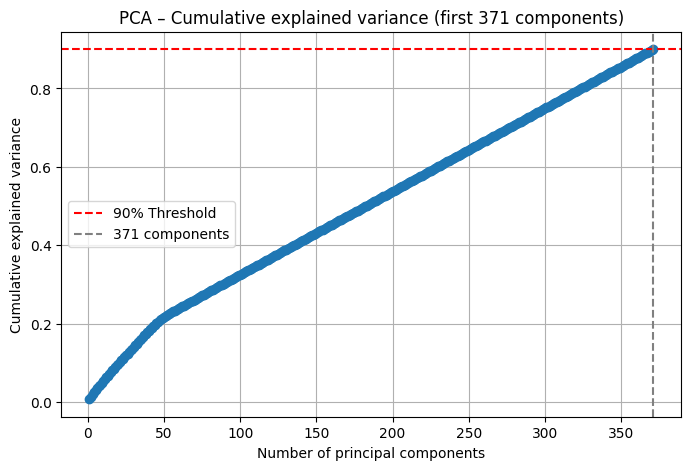

In [119]:
plt.figure(figsize=(8, 5))

plt.plot(
    range(1, n_components_90 + 1),
    cumulative_variance[:n_components_90],
    marker='o'
)

plt.axhline(y=0.90, color='red', linestyle='--', label='90% Threshold')
plt.axvline(x=n_components_90, color='gray', linestyle='--', label=f'{n_components_90} components')

plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA – Cumulative explained variance (first 371 components)")
plt.legend()
plt.grid(True)

plt.show()


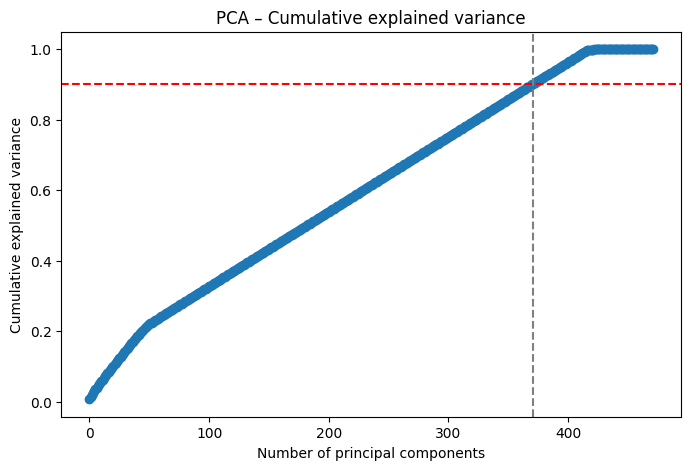

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(0.9, color='red', linestyle='--')
plt.axvline(n_components_90, color='gray', linestyle='--')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA – Cumulative explained variance")
plt.show()


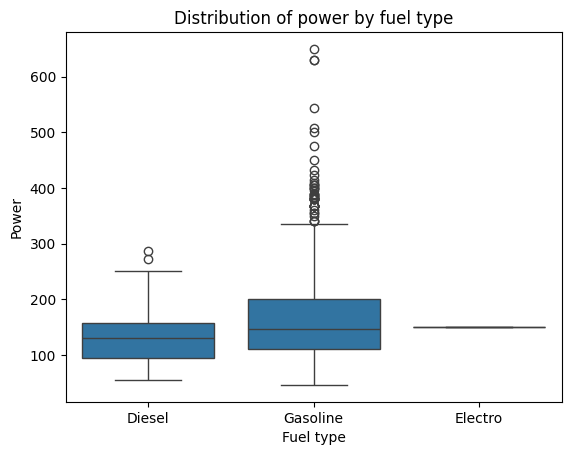

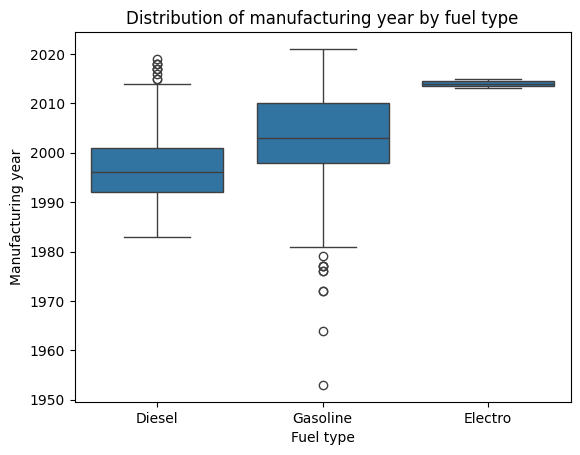

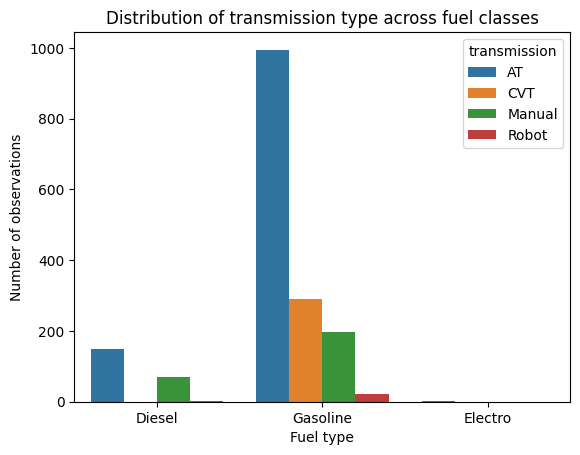

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="fuelType", y="power")
plt.title("Distribution of power by fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Power")
plt.show()

sns.boxplot(data=df, x="fuelType", y="year")
plt.title("Distribution of manufacturing year by fuel type")
plt.xlabel("Fuel type")
plt.ylabel("Manufacturing year")
plt.show()

sns.countplot(data=df, x="fuelType", hue="transmission")
plt.title("Distribution of transmission type across fuel classes")
plt.xlabel("Fuel type")
plt.ylabel("Number of observations")
plt.show()

The graphical analysis indicates that manufacturing year, engine power, and transmission type are relevant features for fuel type classification. While the Electro class appears distinct, some overlap exists between Gasoline and Diesel vehicles.

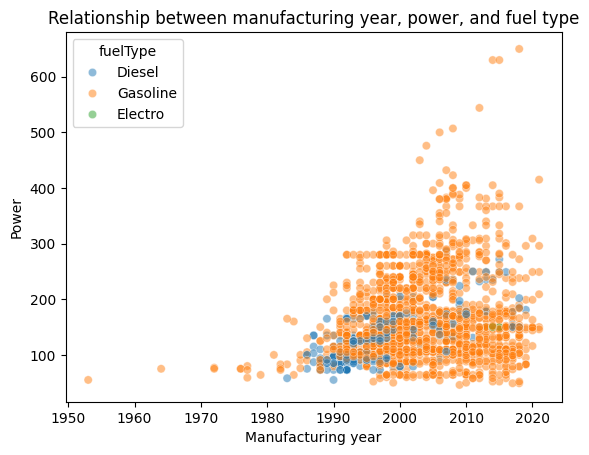

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="year",
    y="power",
    hue="fuelType",
    alpha=0.5
)

plt.title("Relationship between manufacturing year, power, and fuel type")
plt.xlabel("Manufacturing year")
plt.ylabel("Power")
plt.show()


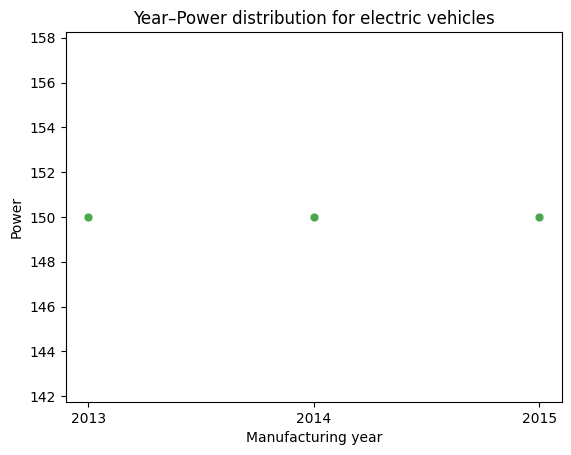

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

df_e = df[df["fuelType"] == "Electro"].copy()
df_e["year"] = df_e["year"].astype(int)

ax = sns.scatterplot(data=df_e, x="year", y="power", color="green", s=40, alpha=0.7)

ax.set_title("Year–Power distribution for electric vehicles")
ax.set_xlabel("Manufacturing year")
ax.set_ylabel("Power")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()


The scatter plot highlights the dominance of the Gasoline and Diesel classes, while the Electro class is significantly underrepresented. This indicates a strong class imbalance in the dataset, which is an important characteristic that must be considered during the modeling phase.

Models

The Electro class was removed from the dataset due to its extremely small number of observations (only 3 instances). Such a limited representation does not allow the models to learn meaningful patterns and would lead to unreliable and unstable classification results. Therefore, the problem is reformulated as a binary classification task between Gasoline and Diesel vehicles.

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Keep only Gasoline and Diesel
df_bin = df_unique[df_unique["fuelType"].isin(["Gasoline", "Diesel"])].copy()

print("Class distribution after filtering:")
print(df_bin["fuelType"].value_counts())
print(df_bin["fuelType"].value_counts(normalize=True).round(4))

# Features / target
X = df_bin.drop(columns=["fuelType"])
y = df_bin["fuelType"]

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nX_train:", X_train.shape)
print("X_test:", X_test.shape)

print("\nFuelType distribution in TRAIN:")
print(y_train.value_counts(normalize=True).round(4))

print("\nFuelType distribution in TEST:")
print(y_test.value_counts(normalize=True).round(4))

Class distribution after filtering:
fuelType
Gasoline    1503
Diesel       221
Name: count, dtype: int64
fuelType
Gasoline    0.8718
Diesel      0.1282
Name: proportion, dtype: float64

X_train: (1379, 6)
X_test: (345, 6)

FuelType distribution in TRAIN:
fuelType
Gasoline    0.8716
Diesel      0.1284
Name: proportion, dtype: float64

FuelType distribution in TEST:
fuelType
Gasoline    0.8725
Diesel      0.1275
Name: proportion, dtype: float64


In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__class_weight": [None, "balanced"]
}

num_cols = ["year", "power"]

results_lr = []

def fit_eval_logreg(cat_cols, label):
    preprocess = ColumnTransformer(
        transformers=[
            ("categorical", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ("numerical", StandardScaler(), num_cols)
        ],
        remainder="drop"
    )

    pipeline = Pipeline(steps=[
        ("preprocessing", preprocess),
        ("model", LogisticRegression(
            max_iter=5000,
            solver="lbfgs",
            penalty="l2",
            random_state=42
        ))
    ])

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid_lr,
        scoring="f1_macro",
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")

    print("\n" + "=" * 70)
    print(f"Logistic Regression – scenario: {label}")
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV F1-macro:", round(grid.best_score_, 4))
    print("Test accuracy:", round(acc, 4))
    print("Test F1-macro:", round(f1m, 4))

    print("\nConfusion matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification report:")
    print(classification_report(y_test, y_pred))

    results_lr.append({
        "Model": "Logistic Regression",
        "Scenario": label,
        "Best C": grid.best_params_["model__C"],
        "Best class_weight": grid.best_params_["model__class_weight"],
        "F1-macro (CV)": round(grid.best_score_, 4),
        "Accuracy (test)": round(acc, 4),
        "F1-macro (test)": round(f1m, 4)
    })

    return grid

The model was evaluated both with and without the name feature in order to assess its impact on classification performance. Since name represents a highly specific vehicle identifier, it may introduce a risk of overfitting by allowing the model to memorize patterns rather than learn generalizable relationships. Comparing the two scenarios helps determine whether this feature provides meaningful predictive value or artificially inflates performance.

In [127]:
# WITH 'name'
grid_lr_with_name = fit_eval_logreg(
    cat_cols=["brand", "name", "bodyType", "transmission"],
    label="WITH 'name'"
)

# WITHOUT 'name'
grid_lr_without_name = fit_eval_logreg(
    cat_cols=["brand", "bodyType", "transmission"],
    label="WITHOUT 'name'"
)

df_results_lr = pd.DataFrame(results_lr)
df_results_lr

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Logistic Regression – scenario: WITH 'name'
Best hyperparameters: {'model__C': 10, 'model__class_weight': None}
Best CV F1-macro: 0.8227
Test accuracy: 0.942
Test F1-macro: 0.8672

Confusion matrix:
[[ 33  11]
 [  9 292]]

Classification report:
              precision    recall  f1-score   support

      Diesel       0.79      0.75      0.77        44
    Gasoline       0.96      0.97      0.97       301

    accuracy                           0.94       345
   macro avg       0.87      0.86      0.87       345
weighted avg       0.94      0.94      0.94       345

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Logistic Regression – scenario: WITHOUT 'name'
Best hyperparameters: {'model__C': 10, 'model__class_weight': None}
Best CV F1-macro: 0.7385
Test accuracy: 0.9275
Test F1-macro: 0.7987

Confusion matrix:
[[ 22  22]
 [  3 298]]

Classification report:
              precision    recall  f1-score   support



,Model,Scenario,Best C,Best class_weight,F1-macro (CV),Accuracy (test),F1-macro (test)
0,Logistic Regression,WITH 'name',10,None,0.8227,0.9420,0.8672
1,Logistic Regression,WITHOUT 'name',10,None,0.7385,0.9275,0.7987


In [128]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for Random Forest
param_grid_rf = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt", "log2"],
    "model__class_weight": [None, "balanced"]
}

num_cols = ["year", "power"]
results_rf = []

def fit_eval_rf(cat_cols, label):
    
    # Preprocessing: OneHotEncoding for categorical features,
    # numerical features passed without scaling (not needed for RF)
    preprocess = ColumnTransformer(
        transformers=[
            ("categorical", OneHotEncoder(handle_unknown="ignore"), cat_cols),
            ("numerical", "passthrough", num_cols)
        ],
        remainder="drop"
    )

    # Full pipeline: preprocessing + model
    pipeline = Pipeline(steps=[
        ("preprocessing", preprocess),
        ("model", RandomForestClassifier(
            random_state=42,
            n_jobs=-1
        ))
    ])

    # Grid search with cross-validation
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid_rf,
        scoring="f1_macro",
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")

    print("\n" + "=" * 70)
    print(f"Random Forest – Scenario: {label}")
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV F1-macro:", round(grid.best_score_, 4))
    print("Test Accuracy:", round(acc, 4))
    print("Test F1-macro:", round(f1m, 4))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    results_rf.append({
        "Model": "Random Forest",
        "Scenario": label,
        "Best params": grid.best_params_,
        "F1-macro (CV)": round(grid.best_score_, 4),
        "Accuracy (test)": round(acc, 4),
        "F1-macro (test)": round(f1m, 4)
    })

    return grid




In [129]:
# WITH 'name'
grid_rf_with_name = fit_eval_rf(
    cat_cols=["brand", "name", "bodyType", "transmission"],
    label="WITH 'name'"
)

# WITHOUT 'name'
grid_rf_without_name = fit_eval_rf(
    cat_cols=["brand", "bodyType", "transmission"],
    label="WITHOUT 'name'"
)

df_results_rf = pd.DataFrame(results_rf)
df_results_rf

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Random Forest – Scenario: WITH 'name'
Best hyperparameters: {'model__class_weight': 'balanced', 'model__max_depth': 20, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV F1-macro: 0.8519
Test Accuracy: 0.9362
Test F1-macro: 0.8594

Confusion Matrix:
[[ 34  10]
 [ 12 289]]

Classification Report:
              precision    recall  f1-score   support

      Diesel       0.74      0.77      0.76        44
    Gasoline       0.97      0.96      0.96       301

    accuracy                           0.94       345
   macro avg       0.85      0.87      0.86       345
weighted avg       0.94      0.94      0.94       345

Fitting 5 folds for each of 96 candidates, totalling 480 fits

Random Forest – Scenario: WITHOUT 'name'
Best hyperparameters: {'model__class_weight': 'balanced', 'model__max_depth': None, 'model__max_features': 'log2', 'model__min_samp

,Model,Scenario,Best params,F1-macro (CV),Accuracy (test),F1-macro (test)
0,Random Forest,WITH 'name',"{'model__class_weight': 'balanced', 'model__ma...",0.8519,0.9362,0.8594
1,Random Forest,WITHOUT 'name',"{'model__class_weight': 'balanced', 'model__ma...",0.8367,0.9391,0.8591


In [139]:
import sys
!{sys.executable} -m pip install optuna xgboost

  Using cached colorlog-6.10.1-py3-none-any.whl.metadata (11 kB)
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.7 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 57.7/57.7 kB 1.5 MB/s eta 0:00:00
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/413.9 kB ? eta -:--:--
   ---------------- ----------------------- 174.1/413.9 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 413.9/413.9 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 1.5/101.7 MB 30.9 MB/s eta 0:00:04
   - -------------------------------------- 4.0/101.7 MB 43.2 MB/s eta 0:00:03
   -- ------------------------------------- 5.7/101.7 MB 45.7 MB/s eta 0:00:03
   -- ------------------------------------- 5.7/101.7 MB 45.7 MB/s eta 0:00:03
   --- ----------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import optuna
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

optuna.logging.set_verbosity(optuna.logging.WARNING)

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


num_cols = ["year", "power"]

# Encode y for XGBoost: 0 = Gasoline, 1 = Diesel
y_train_bin = (y_train == "Diesel").astype(int)
y_test_bin  = (y_test  == "Diesel").astype(int)

# Collect results for final table
results_xgb = []

def build_preprocess(cat_cols, scale_numeric=True):
    transformers = [
        ("categorical", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
    if scale_numeric:
        transformers.append(("numerical", StandardScaler(), num_cols))
    else:
        transformers.append(("numerical", "passthrough", num_cols))

    return ColumnTransformer(transformers=transformers, remainder="drop")


def tune_xgb_with_optuna(cat_cols, label, n_trials=50, scale_numeric=False):
    preprocess = build_preprocess(cat_cols, scale_numeric=scale_numeric)

    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 200, 1200),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "gamma": trial.suggest_float("gamma", 0.0, 5.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
            "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        }

        model = XGBClassifier(
            **params,
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1
        )

        pipe = Pipeline([
            ("preprocessing", preprocess),
            ("model", model)
        ])

        scores = cross_val_score(
            pipe, X_train, y_train_bin,
            cv=cv, scoring="f1_macro", n_jobs=-1
        )
        return float(np.mean(scores))

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials, show_progress_bar=False)

    # Train final model on full train set using best params
    best_model = XGBClassifier(
        **study.best_params,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        n_jobs=-1
    )

    final_pipe = Pipeline([
        ("preprocessing", preprocess),
        ("model", best_model)
    ])

    final_pipe.fit(X_train, y_train_bin)
    y_pred = final_pipe.predict(X_test)

    acc = accuracy_score(y_test_bin, y_pred)
    f1m = f1_score(y_test_bin, y_pred, average="macro")


    results_xgb.append({
        "Model": "XGBoost (Optuna)",
        "Scenario": label,
        "Best params": study.best_params,
        "F1-macro (CV)": round(study.best_value, 4),
        "Accuracy (test)": round(acc, 4),
        "F1-macro (test)": round(f1m, 4),
    })


    print("\n" + "=" * 70)
    print(f"XGBoost (Optuna) – Scenario: {label}")
    print("Best CV F1-macro:", round(study.best_value, 4))
    print("Test Accuracy:", round(acc, 4))
    print("Test F1-macro:", round(f1m, 4))

    return study, final_pipe







In [145]:

# WITH 'name'
study_xgb_with_name, model_xgb_with_name = tune_xgb_with_optuna(
    cat_cols=["brand", "name", "bodyType", "transmission"],
    label="WITH 'name'",
    n_trials=50,
    scale_numeric=False
)

# WITHOUT 'name'
study_xgb_without_name, model_xgb_without_name = tune_xgb_with_optuna(
    cat_cols=["brand", "bodyType", "transmission"],
    label="WITHOUT 'name'",
    n_trials=50,
    scale_numeric=False
)


df_results_xgb = pd.DataFrame(results_xgb)
df_results_xgb



XGBoost (Optuna) – Scenario: WITH 'name'
Best CV F1-macro: 0.8516
Test Accuracy: 0.9478
Test F1-macro: 0.8727

XGBoost (Optuna) – Scenario: WITHOUT 'name'
Best CV F1-macro: 0.8293
Test Accuracy: 0.9391
Test F1-macro: 0.8591


,Model,Scenario,Best params,F1-macro (CV),Accuracy (test),F1-macro (test)
0,XGBoost (Optuna),WITH 'name',"{'n_estimators': 1070, 'max_depth': 8, 'learni...",0.8516,0.9478,0.8727
1,XGBoost (Optuna),WITHOUT 'name',"{'n_estimators': 1080, 'max_depth': 6, 'learni...",0.8293,0.9391,0.8591


In [ ]:

df_lr = df_results_lr.copy()
df_rf = df_results_rf.copy()
df_xgb = df_results_xgb.copy()


df_lr = df_lr.rename(columns={
    "F1-macro (CV)": "F1-macro (CV)",
    "Accuracy (test)": "Accuracy (test)",
    "F1-macro (test)": "F1-macro (test)"
})

df_rf = df_rf.rename(columns={
    "F1-macro (CV)": "F1-macro (CV)",
    "Accuracy (test)": "Accuracy (test)",
    "F1-macro (test)": "F1-macro (test)"
})

df_xgb = df_xgb.rename(columns={
    "Best CV F1-macro": "F1-macro (CV)"
})

columns_to_keep = [
    "Model",
    "Scenario",
    "F1-macro (CV)",
    "Accuracy (test)",
    "F1-macro (test)"
]

df_lr = df_lr[columns_to_keep]
df_rf = df_rf[columns_to_keep]
df_xgb = df_xgb[columns_to_keep]

# Concatenate all results
df_final_results = pd.concat(
    [df_lr, df_rf, df_xgb],
    ignore_index=True
)


df_final_results = df_final_results.sort_values(
    by="F1-macro (test)",
    ascending=False
).reset_index(drop=True)

df_final_results

,Model,Scenario,F1-macro (CV),Accuracy (test),F1-macro (test)
0,XGBoost (Optuna),WITH 'name',0.8516,0.9478,0.8727
1,Logistic Regression,WITH 'name',0.8227,0.9420,0.8672
2,Random Forest,WITH 'name',0.8519,0.9362,0.8594
3,Random Forest,WITHOUT 'name',0.8367,0.9391,0.8591
4,XGBoost (Optuna),WITHOUT 'name',0.8293,0.9391,0.8591
5,Logistic Regression,WITHOUT 'name',0.7385,0.9275,0.7987


Final Conclusion

XGBoost optimized with Optuna and including the name feature achieved the best performance, with the highest F1-macro and test accuracy.

Random Forest showed stable but slightly lower results, while Logistic Regression was more affected by removing the name feature.

Overall, XGBoost is the most suitable model for this fuel type classification task.